# Preparing 

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [3]:
diabetes = pd.read_csv('E:/Data Science Projects/Diabetes prediction/diabetes_prediction_dataset.csv')

In [4]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Preprocessing

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Duplicated rows

In [6]:
diabetes.duplicated().sum()

3854

In [7]:
diabetes.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Unique Values in given columns

In [8]:
columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

for i in columns:
    print(i,':',diabetes[i].unique())

gender : ['Female' 'Male' 'Other']
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
diabetes : [0 1]


# EDA

Summary of data

In [9]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Data Correlation

In [35]:
diabetes.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


Count of individuals by smooking history

C:\Users\User\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


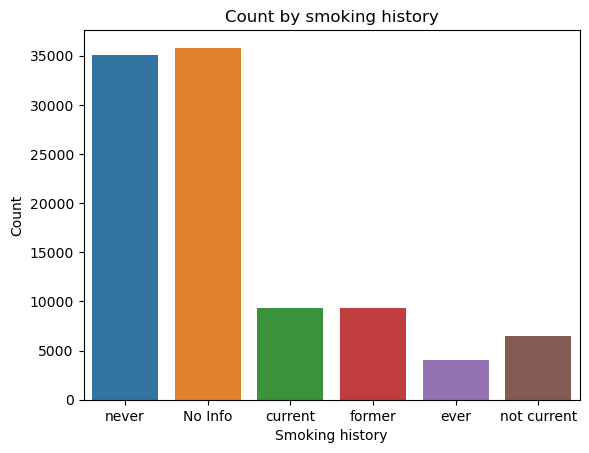

In [21]:
sns.countplot(diabetes['smoking_history'])

plt.xlabel('Smoking history')
plt.ylabel('Count')
plt.title('Count by smoking history')
plt.show()

Age distribution

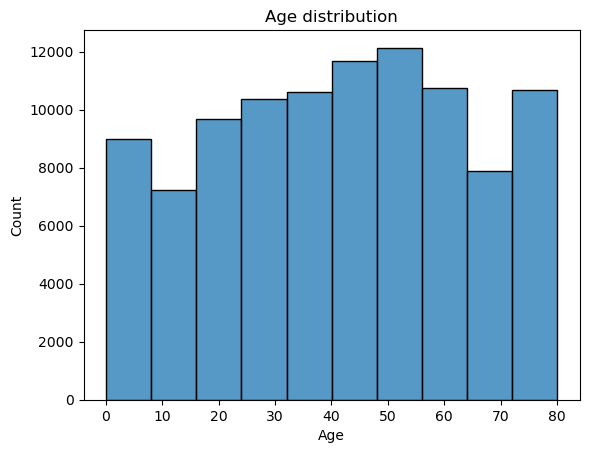

In [30]:
sns.histplot(diabetes['age'], bins = 10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

Age Vs Diabetes

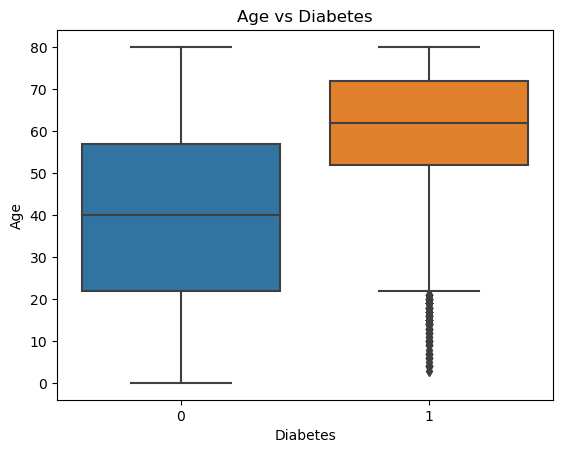

In [31]:
sns.boxplot(x = 'diabetes', y = 'age', data = diabetes)
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Age vs Diabetes')
plt.show()

BMI vs Diabetes

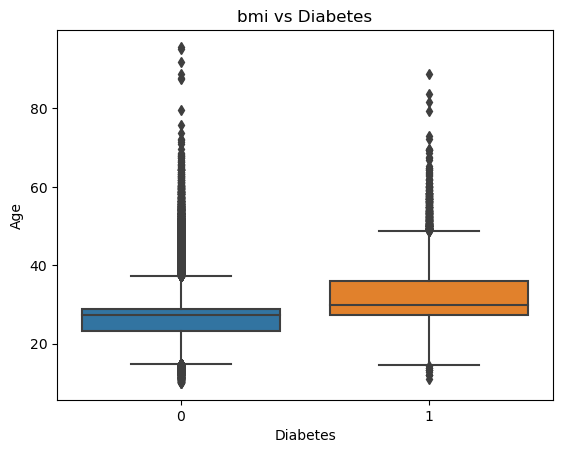

In [32]:
sns.boxplot(x = 'diabetes', y = 'bmi', data = diabetes)
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('bmi vs Diabetes')
plt.show()

HbA1c_level Vs Diabetes

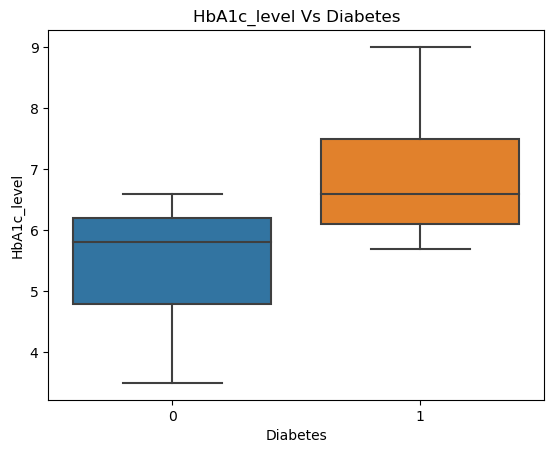

In [34]:
sns.boxplot(x = 'diabetes', y = 'HbA1c_level', data = diabetes)
plt.xlabel('Diabetes')
plt.ylabel('HbA1c_level')
plt.title('HbA1c_level Vs Diabetes')
plt.show()

Blood Glucose Level vs Diabetes

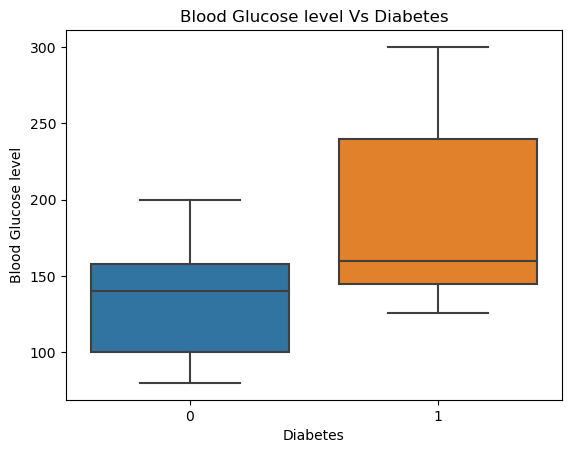

In [39]:
sns.boxplot(x = 'diabetes', y = 'blood_glucose_level', data = diabetes)
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose level')
plt.title('Blood Glucose level Vs Diabetes')
plt.show()

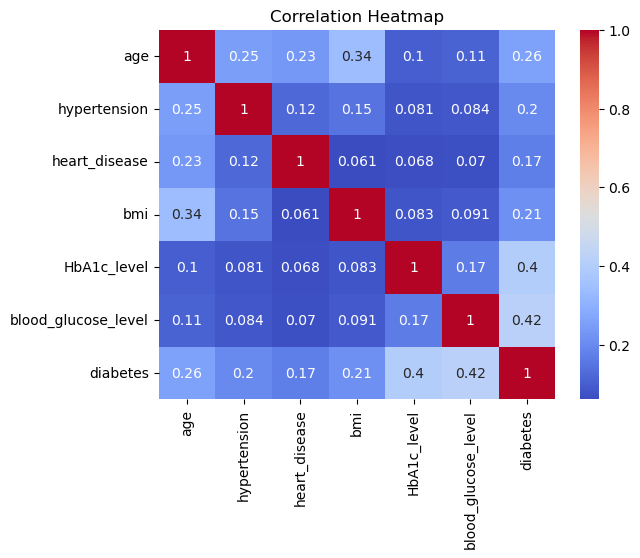

In [45]:
sns.heatmap(diabetes.corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()